<a href="https://colab.research.google.com/github/oskar-fm/Visualizations/blob/main/StatsBomB_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalando funciones
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.5 MB/s eta 0:00:00


In [2]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
import seaborn as sns

In [3]:
#LOAD COMPETITION, MATCH AND EVENT DATA FROM STATSBOMBPY

In [4]:
#call statsbombpy API to get all free competitions
free_camps = sb.competitions()

#print a list of free competitions
free_camps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [5]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id=55, season_id=282
euro_2024_matches = sb.matches(competition_id=55,season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [6]:
#create a variable for the team you want to look into
team="England"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team']==team) | (euro_2024_matches['away_team']==team)]

#sort by match date to get the most recent match
matches_df = matches_df.sort_values(by='match_date',ascending=False)

#print the first 5 rows of data
matches_df.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
7,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,...,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
16,3941017,2024-06-30,19:00:00.000,Europe - UEFA Euro,2024,England,Slovakia,2,1,available,...,2024-07-10T11:31:44.852038,4,Round of 16,VELTINS-Arena,Halil Umut Meler,Gareth Southgate,Francesco Calzona,1.1.0,2,2
38,3930181,2024-06-25,22:00:00.000,Europe - UEFA Euro,2024,England,Slovenia,0,0,available,...,2024-07-10T14:27:59.561474,3,Group Stage,RheinEnergieStadion,Clément Turpin,Gareth Southgate,Matjaž Kek,1.1.0,2,2


In [7]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.loc[0]

#or copy match id
latest_match_id=3943043

In [8]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=latest_match_id)

#print the first 5 rows of data
events_df.head (5)

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [9]:
#print a list of columns available in the event data
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [10]:
#separated start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [11]:
#EXAMPLE ONE: PASSES AND CARRIERS INTO THE FINAL THIRD

In [12]:
#Data manipulation
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [13]:
events_df.pass_outcome.unique()

array([nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'], dtype=object)

In [14]:
#filter for events done by the focus team
#fiter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())
]
#get count for each player
f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

In [15]:
f3rd_passes_count

,player,0
0,Cole Palmer,1
1,Harry Kane,1
2,John Stones,2
3,Jordan Pickford,1
4,Jude Bellingham,1
5,Kyle Walker,4
6,Marc Guehi,1


In [16]:
#rename second column
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes"}, inplace=True)

f3rd_passes_count

,player,Passes
0,Cole Palmer,1
1,Harry Kane,1
2,John Stones,2
3,Jordan Pickford,1
4,Jude Bellingham,1
5,Kyle Walker,4
6,Marc Guehi,1


In [17]:
#get final third carries for focus team
f3rd_carriers=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carriers_count=f3rd_carriers.groupby('player').size().reset_index()

In [18]:
f3rd_carriers_count

,player,0
0,Bukayo Saka,4
1,Cole Palmer,1
2,Harry Kane,1
3,John Stones,1
4,Jude Bellingham,4
5,Luke Shaw,1
6,Phil Foden,1


In [19]:
#rename second column
f3rd_carriers_count.rename(columns={f3rd_carriers_count.columns[1]: "Carries"}, inplace=True)

f3rd_carriers_count

,player,Carries
0,Bukayo Saka,4
1,Cole Palmer,1
2,Harry Kane,1
3,John Stones,1
4,Jude Bellingham,4
5,Luke Shaw,1
6,Phil Foden,1


In [20]:
#combine data frames
progressions_df=pd.merge(f3rd_passes_count,f3rd_carriers_count,how='outer', on = ['player'])

In [21]:
progressions_df

,player,Passes,Carries
0,Bukayo Saka,NaN,4.0
1,Cole Palmer,1.0,1.0
2,Harry Kane,1.0,1.0
3,John Stones,2.0,1.0
4,Jordan Pickford,1.0,NaN
5,Jude Bellingham,1.0,4.0
6,Kyle Walker,4.0,NaN
7,Luke Shaw,NaN,1.0
8,Marc Guehi,1.0,NaN
9,Phil Foden,NaN,1.0


In [22]:
#add 0 where value is NAN
progressions_df=progressions_df.fillna(0)

In [23]:
progressions_df

,player,Passes,Carries
0,Bukayo Saka,0.0,4.0
1,Cole Palmer,1.0,1.0
2,Harry Kane,1.0,1.0
3,John Stones,2.0,1.0
4,Jordan Pickford,1.0,0.0
5,Jude Bellingham,1.0,4.0
6,Kyle Walker,4.0,0.0
7,Luke Shaw,0.0,1.0
8,Marc Guehi,1.0,0.0
9,Phil Foden,0.0,1.0


In [24]:
#add a new column with total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']

In [25]:
progressions_df

,player,Passes,Carries,total
0,Bukayo Saka,0.0,4.0,4.0
1,Cole Palmer,1.0,1.0,2.0
2,Harry Kane,1.0,1.0,2.0
3,John Stones,2.0,1.0,3.0
4,Jordan Pickford,1.0,0.0,1.0
5,Jude Bellingham,1.0,4.0,5.0
6,Kyle Walker,4.0,0.0,4.0
7,Luke Shaw,0.0,1.0,1.0
8,Marc Guehi,1.0,0.0,1.0
9,Phil Foden,0.0,1.0,1.0


In [26]:
progressions_df.sort_values(by='total', ascending=False, inplace=True)

In [27]:
progressions_df

,player,Passes,Carries,total
5,Jude Bellingham,1.0,4.0,5.0
0,Bukayo Saka,0.0,4.0,4.0
6,Kyle Walker,4.0,0.0,4.0
3,John Stones,2.0,1.0,3.0
1,Cole Palmer,1.0,1.0,2.0
2,Harry Kane,1.0,1.0,2.0
4,Jordan Pickford,1.0,0.0,1.0
7,Luke Shaw,0.0,1.0,1.0
8,Marc Guehi,1.0,0.0,1.0
9,Phil Foden,0.0,1.0,1.0


In [28]:
#VISUALIZE

<Figure size 1500x1500 with 0 Axes>

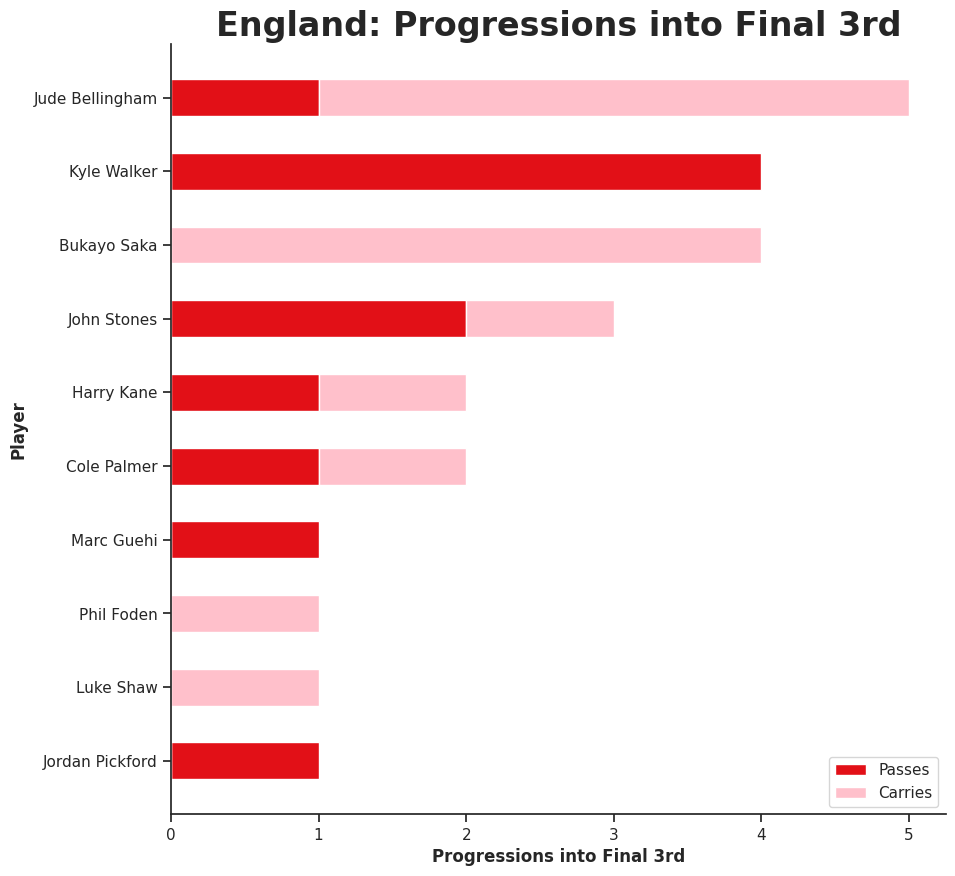

In [52]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='pink'

#sort to get lowest values first )so it plots in the correct order on our bar chart)
progressions_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[['player','Passes','Carries']]

#create figure and set some style parameters
plt.figure(figsize=(15,15))
sns.set(rc={'axes.facecolor':'white','figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour], legend=True, figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd", fontdict = {'fontsize':12, 'weight':'semibold'})
plt.ylabel(ylabel="Player", fontdict = {'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd", fontdict = {'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

In [51]:
events_df.player.unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Unai Simón Mendibil',
       'Robin Aime Robert Le Normand', 'Daniel Carvajal Ramos',
       'Álvaro Borja Morata Martín', 'Daniel Olmo Carvajal',
       'Jude Bellingham', 'Rodrigo Hernández Cascante', 'Aymeric Laporte',
       'Luke Shaw', 'Declan Rice', 'Marc Guehi', 'Phil Foden',
       'Kyle Walker', 'Lamine Yamal Nasraoui Ebana',
       'Marc Cucurella Saseta', 'Nicholas Williams Arthuer', 'Harry Kane',
       'Bukayo Saka', 'Fabián Ruiz Peña', 'John Stones',
       'Martín Zubimendi Ibáñez', 'Cole Palmer', 'Mikel Oyarzabal Ugarte',
       'José Ignacio Fernández Iglesias', 'Ollie Watkins', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

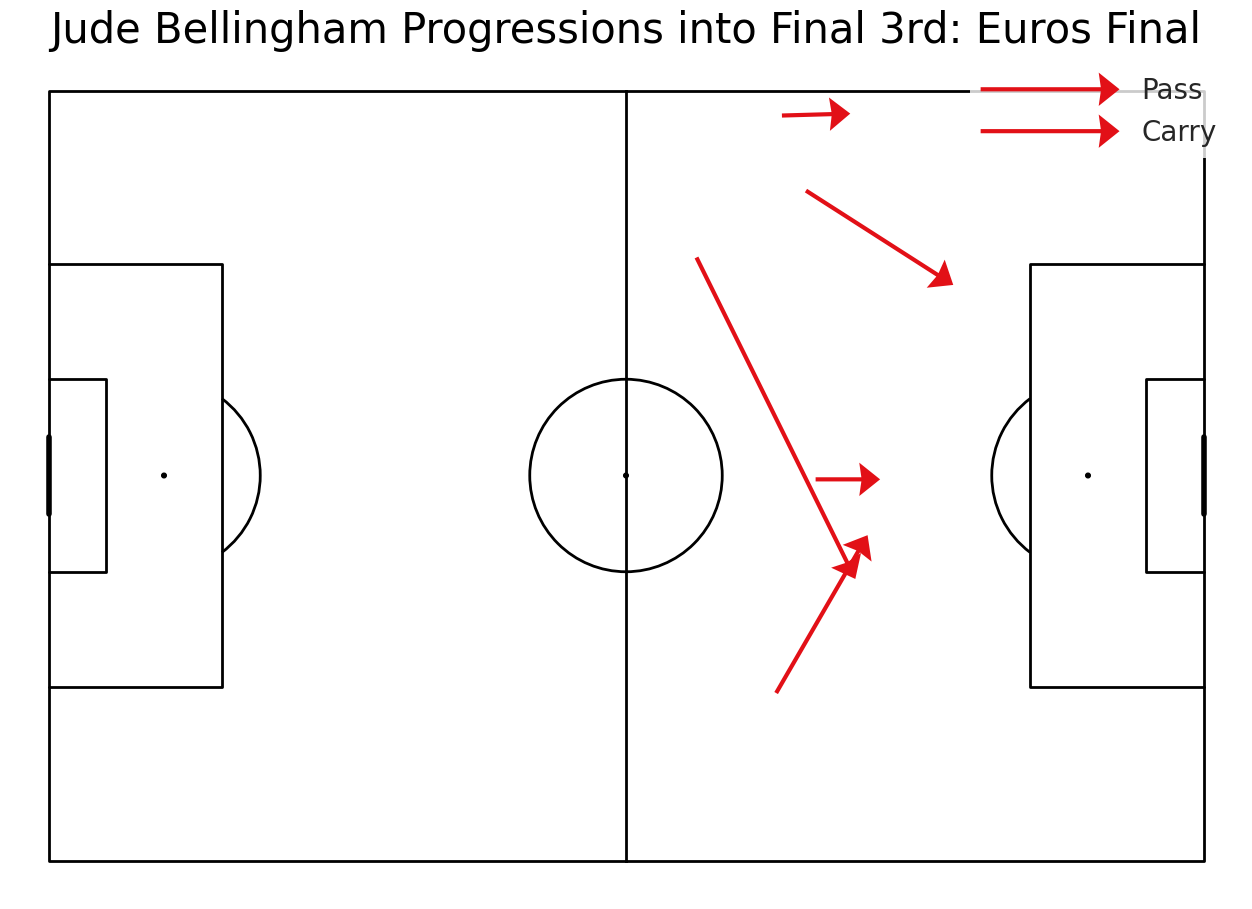

In [53]:
#Visualize for a given player
player_name="Jude Bellingham"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carriers=f3rd_carriers[(f3rd_carriers.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label= "Pass")

#plot the carriers
pitch.arrows(player_carriers.x, player_carriers.y,
player_carriers.carry_end_x, player_carriers.carry_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label= "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30, color='black')

In [54]:
#EXAMPLE TWO: COMPARING TOUCH MAPS

In [55]:
#Data manipulation

In [56]:
player2="Phil Foden"
player1="Jude Bellingham"
touches=['Pass', 'Ball Receipt', 'Carry', 'Clearance', 'Foul Won', 'Block', 'Ball Recovery', 'Duel', 'Interception', 'Miscontrol', 'Shot']

In [57]:
player1_df=events_df[(events_df.player==player1)&(events_df.type.isin(touches))]
player2_df=events_df[(events_df.player==player2)&(events_df.type.isin(touches))]

In [58]:
#VISUALIZE

In [59]:
#create colout map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

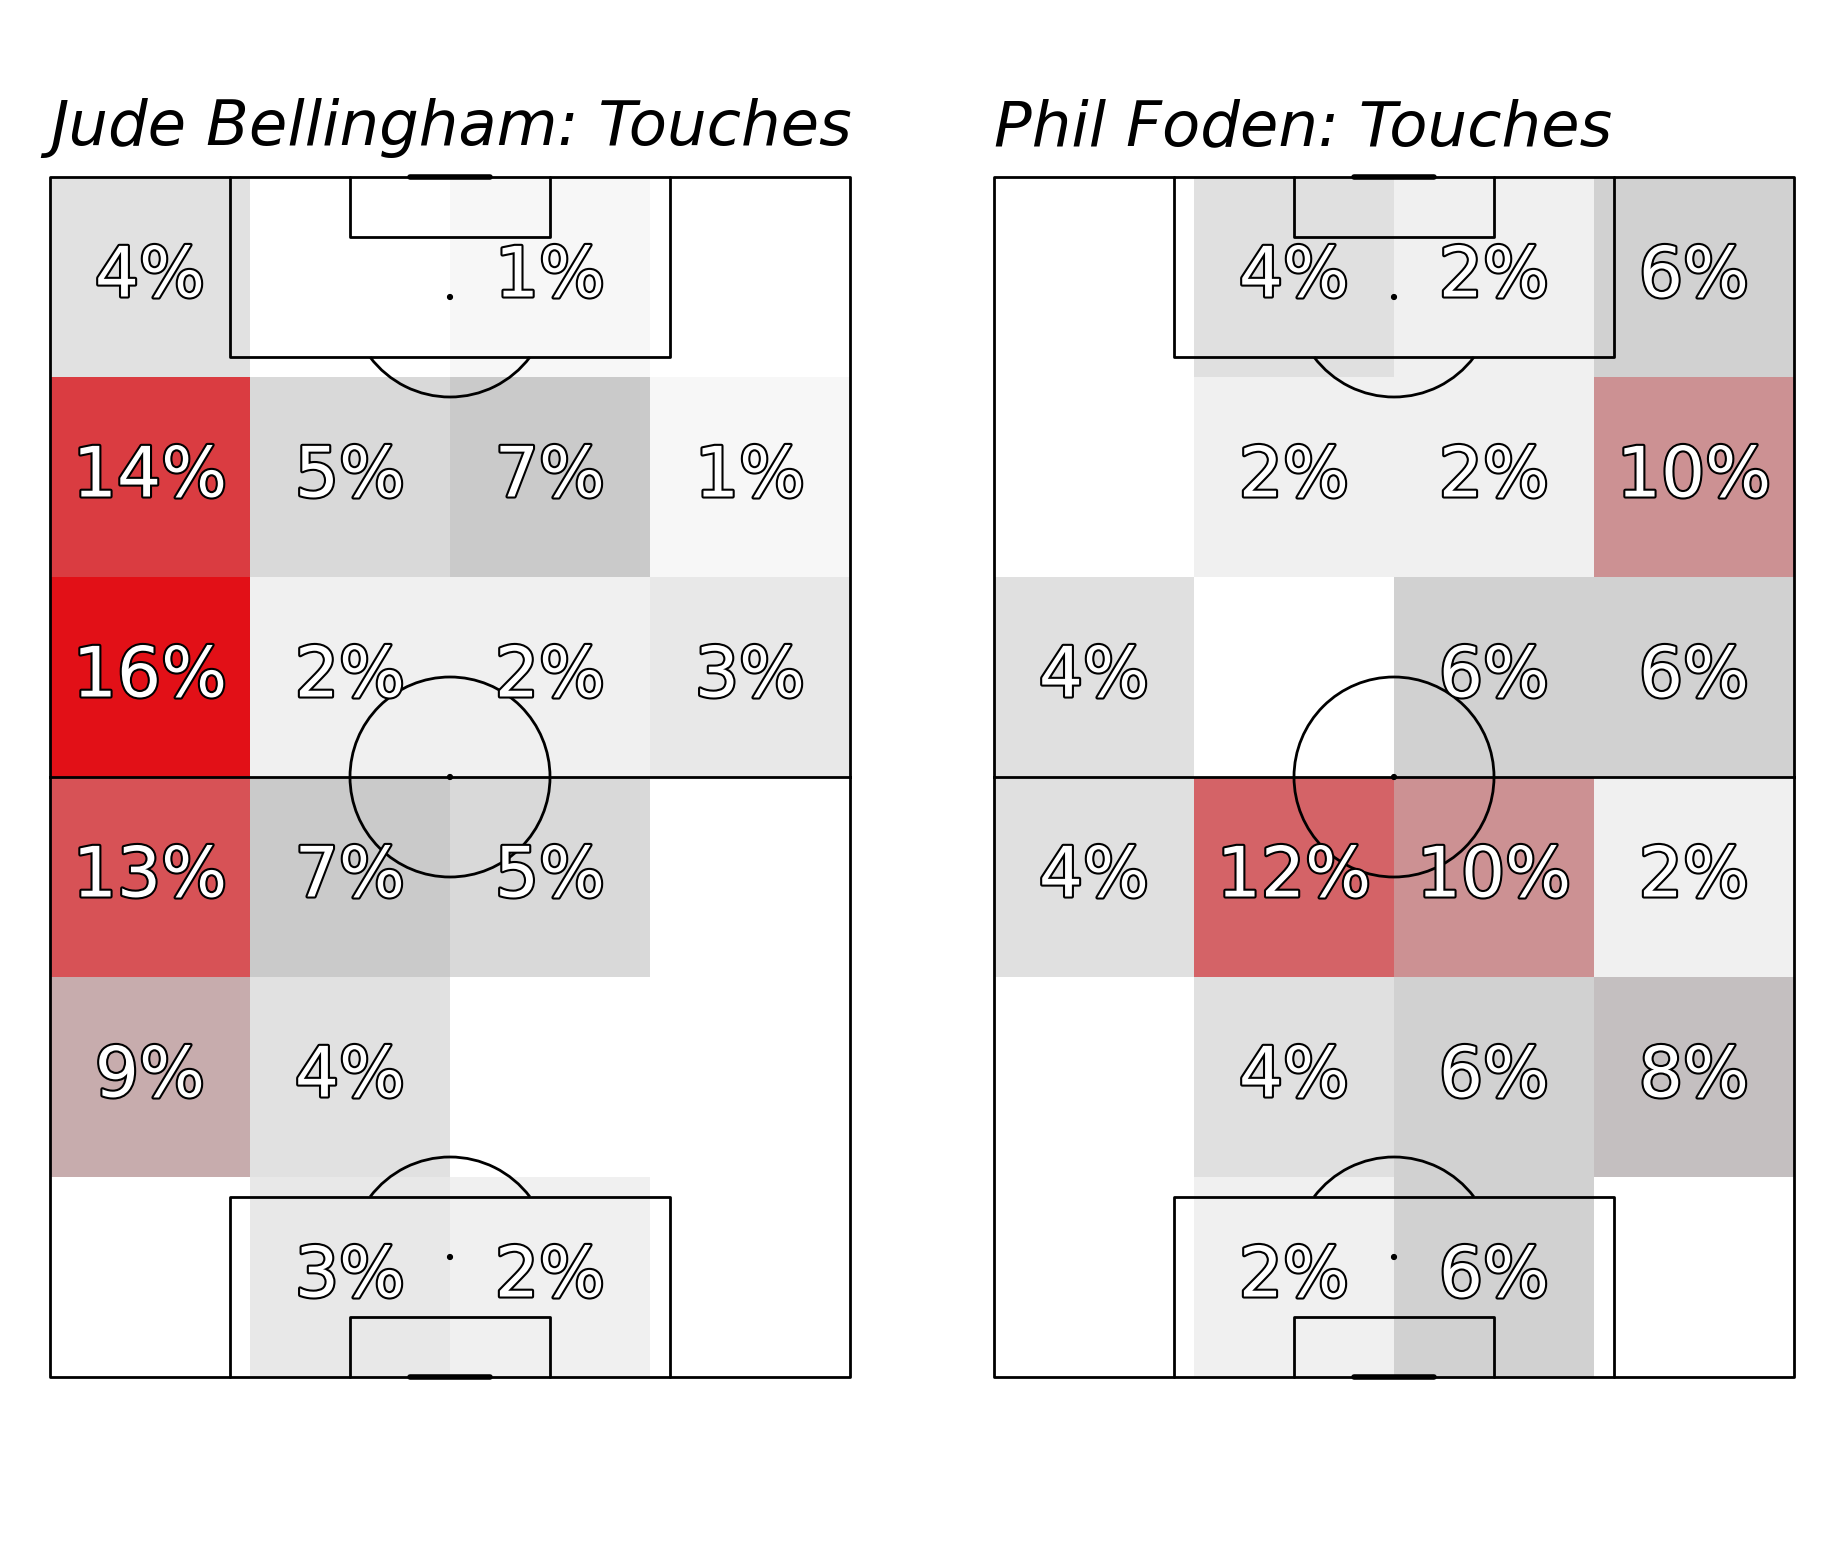

In [60]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2, half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2, figheight=16, grid_width=0.65, endnote_height=0.03, endnote_space=0.05, axis=False, title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count', bins=(6, 4), normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count', bins=(6, 4), normalize=True)

#calculate vmax value
#we can both our heatmaps to use the same colour spectrum
vmax1 = bin_statistic1['statistic'].max()
vmax2 = bin_statistic2['statistic'].max()

if vmax1 > vmax2:
   vmax = vmax1
else:
   vmax = vmax2

#set vmin as zero
vmin = 0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)
#add percentajes for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white', path_effects=path_eff, fontsize=50, ax=axs['pitch'][0], str_format='{:.0%}', ha='center', va='center', exclude_zeros=True)
#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black', va='center', fontsize=45, ax=axs['pitch'][0], style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)
#add percentajes for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white', path_effects=path_eff, fontsize=50, ax=axs['pitch'][1], str_format='{:.0%}', ha='center', va='center', exclude_zeros=True)
#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black', va='center', fontsize=45, ax=axs['pitch'][1], style='italic')

In [61]:
#BONUS

In [62]:
#get event data for entire season
comp_events_df=sb.competition_events(country='Europe', division='UEFA Euro', season='2024', gender="male")

In [63]:
comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
comp_events_df[['pass_end_x', 'pass_end_y']] = comp_events_df['pass_end_location'].apply(pd.Series)
comp_events_df[['carry_end_x', 'carry_end_y']] = comp_events_df['carry_end_location'].apply(pd.Series)

<ipython-input-63-5b91cce7ad0b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
<ipython-input-63-5b91cce7ad0b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
<ipython-input-63-5b91cce7ad0b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [65]:
#Get top xG Performers across the tournament. Create a shot map for the top player
#get non penalty shots and non penalty goals
shots_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")]
goals_dfe=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type=="Penalty")&(comp_events_df.shot_outcome=="Goal")]

#SHOTS
#get count for each player, include team info
shots_count=shots_df.groupby(['player','team']).size().reset_index()
#rename second column
shots_count.rename(columns={shots_count.columns[2]: "np Shots "}, inplace=True)

#GOALS
#get count for each player, include team info
goals_count=goals_dfe.groupby(['player','team']).size().reset_index()
#rename second column
goals_count.rename(columns={goals_count.columns[2]: "np Goals "}, inplace=True)